# This is the Juypter Notebook containing simulations for the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [2]:
import bivirus
import numpy as np

In [3]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, W=0.5, iterations=10000, tolerance=3e-4)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1, B2 = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
B1, B2 = np.round(B1, 2), np.round(B2, 2)

B = [B1, B2]
delta = [
    10 * np.ones(config.N),
    10 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[0.38 0.42 0.2  0.17 0.32 0.08 0.22 0.07 0.19 0.27 0.21 0.04 0.04 0.27
  0.16 0.35 0.26 0.39 0.42 0.26]
 [0.24 0.45 0.03 0.11 0.47 0.44 0.14 0.07 0.4  0.5  0.08 0.01 0.05 0.08
  0.23 0.48 0.05 0.46 0.32 0.29]
 [0.25 0.29 0.27 0.45 0.32 0.36 0.08 0.46 0.28 0.25 0.36 0.22 0.06 0.41
  0.38 0.38 0.23 0.27 0.38 0.32]
 [0.01 0.43 0.44 0.06 0.35 0.42 0.1  0.25 0.47 0.14 0.19 0.36 0.41 0.28
  0.5  0.06 0.16 0.1  0.29 0.38]
 [0.23 0.25 0.09 0.33 0.02 0.46 0.17 0.37 0.47 0.48 0.4  0.   0.05 0.21
  0.41 0.04 0.4  0.03 0.04 0.09]
 [0.29 0.15 0.13 0.22 0.39 0.14 0.42 0.16 0.34 0.12 0.25 0.08 0.44 0.26
  0.27 0.22 0.48 0.01 0.31 0.  ]
 [0.37 0.2  0.41 0.07 0.33 0.34 0.28 0.41 0.41 0.17 0.48 0.34 0.07 0.35
  0.26 0.02 0.34 0.18 0.34 0.34]
 [0.37 0.29 0.07 0.49 0.44 0.48 0.01 0.24 0.44 0.22 0.21 0.17 0.04 0.05
  0.46 0.12 0.24 0.1  0.14 0.  ]
 [0.35 0.07 0.46 0.24 0.14 0.38 0.2  0.11 0.18 0.37 0.17 0.42 0.17 0.16
  0.34 0.3  0.48 0.29 0.1  0.02]
 [0.28 0.43 0.39 0.39 0.43 0.47 0.15 0.32 0.18 0

In [4]:
# check assumptions of the theorems
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))
# print("Theorem 4:", bivirus.check_theorem_4(B, delta))

Assumptions of theorems:
spectral radius 1 is 0.994877043820584
spectral radius 2 is 0.994973348258231
Theorem 2 satisfied: True
Theorem 3: 0


All assumptions satisfied
Converged at iteration 634
All assumptions satisfied
Converged at iteration 616
All assumptions satisfied
Converged at iteration 639
All assumptions satisfied
Converged at iteration 600
All assumptions satisfied
Converged at iteration 578
All assumptions satisfied
Converged at iteration 602
All assumptions satisfied
Converged at iteration 595
All assumptions satisfied
Converged at iteration 594
All assumptions satisfied
Converged at iteration 571


/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/Double-systems-analysis/bivirus.py:21: RuntimeWarning: divide by zero encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/Double-systems-analysis/bivirus.py:21: RuntimeWarning: overflow encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/Double-systems-analysis/bivirus.py:21: RuntimeWarning: invalid value encountered in matmul
  x[0] = x[0] + h * ((np.eye(N) - sum_of_x) @ B[0] - np.diag(delta[0])) @ x[0]
/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/Double-systems-analysis/bivirus.py:22: RuntimeWarning: divide by zero encountered in matmul
  x[1] = x[1] + h * ((np.eye(N) - sum_of_x) @ B[1] - np.diag(delta[1])) @ x[1]
/Us

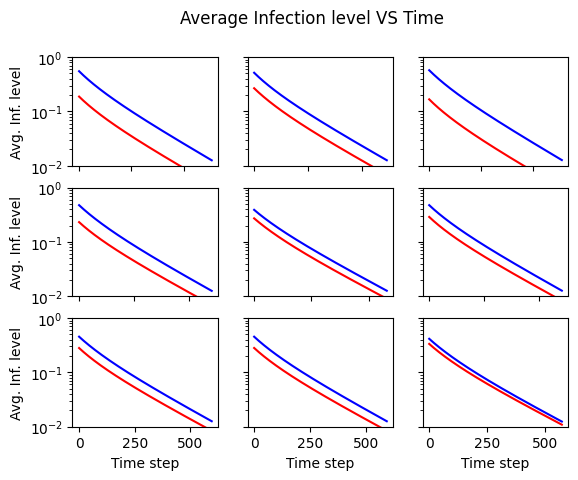

In [5]:
# run simulation with 9 random initial conditions
# and plot the results in a 3x3 grid
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='log')